In [1]:
import sys
import os
# need to add the path to import module
sys.path.append("/home/jovyan/work")

In [2]:
# sys.path
# !pip install livelossplot

In [3]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook
import random
from livelossplot import PlotLosses

In [4]:
from functions.functions import generate_primes, dist_between_two_points, score_tour_numba

In [5]:
cities_read = pd.read_csv('../data/cities.csv')

In [6]:
prime = generate_primes(cities_read.shape[0] + 1)

In [7]:
path = np.zeros(cities_read.shape[0] + 1)
path.dtype = int

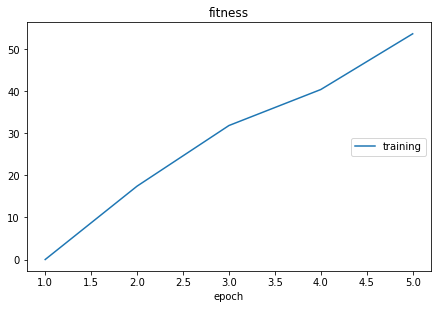

fitness:
training   (min:    0.000, max:   53.618, cur:   53.618)


In [ ]:
liveplot = PlotLosses()
for j in range(1, cities_read.shape[0]-1):
    liveplot.update({
                    'fitness': score_tour_numba(path, cities_read.X.values, cities_read.Y.values, prime),
                })
    liveplot.draw()
    id_ = path[j - 1]
    min_dst = 1000000
    next_town = 0
    for i in tqdm_notebook(np.setdiff1d(cities_read.CityId.values, path)):
        X = np.zeros(2)
        Y = np.zeros(2)
        X[0] = cities_read.iloc[id_].X
        X[1] = cities_read.iloc[i].X
        Y[0] = cities_read.iloc[id_].Y
        Y[1] = cities_read.iloc[i].Y
        alpha = 1.0
#         if (j - 1) % 10 == 9 and prime[id_] == 0:
#             alpha = 1.1
        dbtp = dist_between_two_points(X,Y, alpha)
        if dbtp < min_dst:
            min_dst = dbtp
            next_town = i
    path[j] = next_town
            

In [ ]:
path[:15]

In [ ]:
path[:15]

In [ ]:
score_tour_numba(path, cities_read.X.values, cities_read.Y.values, prime)

In [ ]:
score_tour_numba(path, cities_read.X.values, cities_read.Y.values, prime)